## GMRF model

In [1]:
import math
import matplotlib.pyplot as plt
import random
import numpy 
import math
import matplotlib.pyplot as plt
import random
from scipy import signal
from scipy.spatial.distance import pdist,squareform
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import itertools
from sklearn.cluster import KMeans
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
get_ipython().magic(u'matplotlib inline')
from PIL import Image
from collections import Counter
import datetime
import matplotlib.mlab as mlab

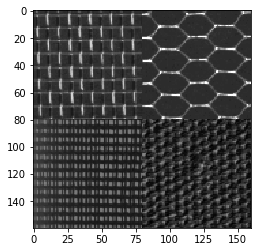

Single-linkage accuracy: 0.9157941635108042
Ward-linkage accuracy: 0.8766985965693919
K-means accuracy: 0.9465359768322567


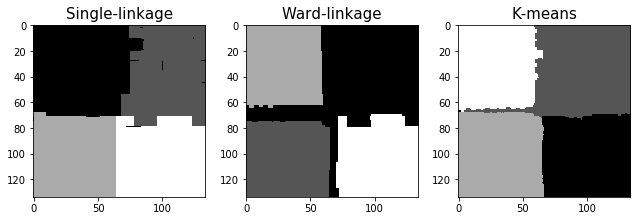

Time: 10.2 min 



In [2]:
def ImageToMatrix(filename):
    im = Image.open(filename)
    width,height = im.size
    im = im.convert("L") 
    data = im.getdata()
    data = np.matrix(data,dtype='float')/255.0
    
    data = data - numpy.mean(data)
    data = data/numpy.std(data)
    
    new_data = np.reshape(data,(height,width))
    return new_data

def MatrixToImage(data):
    data = data*255
    new_im = Image.fromarray(data.astype(np.uint8))
    return new_im

def accu(label):
    count = [[0 for ii in range(4)] for ll in range(4)]
    for h in range(len(label)):
        for g in range(len(label[0])):
            for hh in range(4):
                if h+m < nn and g+m < nn and label[h][g] == hh:
                    count[0][hh] = count[0][hh] + 1
                if h+m >= nn and g+m < nn and label[h][g] == hh:
                    count[1][hh] = count[1][hh] + 1
                if h+m < nn and g+m >= nn and label[h][g] == hh:
                    count[2][hh] = count[2][hh] + 1
                if h+m >= nn and g+m >= nn and label[h][g] == hh:
                    count[3][hh] = count[3][hh] + 1
    lis1 = [list(i) for i in list(itertools.permutations([0,1,2,3]))]
    re_sum = []
    for g in range(len(lis1)):
        summ = 0
        for h in range(4):
            summ += count[h][lis1[g][h]]
        re_sum.append(summ)
    return max(re_sum)/(len(label)*len(label[0]))

nn=80
n=2*nn
m = round(n**0.5)
fig =['D6.gif','D21.gif','D34.gif','D77.gif']

start_time = datetime.datetime.now() 
filename1 = fig[0]
data1 = ImageToMatrix(filename1)
data1 = data1[0:n,0:n]
filename2 = fig[1]
data2 = ImageToMatrix(filename2)
data2 = data2[0:n,0:n]
filename3 = fig[2]
data3 = ImageToMatrix(filename3)
data3 = data3[0:n,0:n]
filename4 = fig[3]
data4 = ImageToMatrix(filename4)
data = data4[0:n,0:n]
co = 0
c1 = 0
c2 = 0
for kk in range(n):
    for jj in range(n):
        if kk < nn and jj < nn:
            co=co+1
            data[kk,jj] = data1[kk,jj]
        elif kk >= nn and jj < nn:
            c1=c1+1
            data[kk,jj] = data2[kk,jj]
        elif kk < nn and jj >= nn:
            c2=c2+1
            data[kk,jj] = data3[kk,jj]
# print(co/(n**2),c1/(n**2),c2/(n**2))
new_im = MatrixToImage(data)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.show()


lis = []
for i in range(m, n-m):
    for j in range(m, n-m):
        mat = data[i-m:i+m+1,j-m:j+m+1]
        matt = numpy.rot90(mat, 2)/((2*m+1)**2)
        res = signal.convolve2d(mat, matt, mode='full')
        res = res[m:3*m+1,m:3*m+1]
        res = res.flatten().tolist()
        res.append(3*i/n)
        res.append(3*j/n)
        lis.append(res) 
lis1 = lis.copy()

Z = linkage(lis, 'single')
ZZ = Z[:,3]
r= 0
while ZZ[r] <= ((n-2*m)**2)*0.25:
    r=r+1
r=r-1
label = fcluster(Z,Z[r,2],'distance')
val = Counter(label).most_common(1)[0][0]
label0 = [0 if x!=val else 1 for x in label]
cou0 = 0
for i in range((n-2*m)**2):
    if label[(n-2*m)**2-1-i]==val:
        lis.pop((n-2*m)**2-1-i)
        cou0 +=1
        
Z = linkage(lis, 'single')
ZZ = Z[:,3]
r= 0
while ZZ[r] <= ((n-2*m)**2)*0.25:
    r=r+1
r=r-1
label = fcluster(Z,Z[r,2],'distance')
val = Counter(label).most_common(1)[0][0]
label1 = [0 if x!=val else 1 for x in label]
cou1 = 0
for i in range(len(label)):
    if label[len(label)-1-i]==val:
        lis.pop(len(label)-1-i)
        cou1 +=1
        
Z = linkage(lis, 'single')
ZZ = Z[:,3]
r= 0
while ZZ[r] <= ((n-2*m)**2)*0.25-1:
    r=r+1
r=r-1
label = fcluster(Z,Z[r,2],'distance')
val = Counter(label).most_common(1)[0][0]
label2 = [0 if x!=val else 1 for x in label]
cou2 =0
for i in range(len(label)):
    if label[len(label)-1-i]==val:
        lis.pop(len(label)-1-i)
        cou2 +=1
                
plt.rcParams['figure.figsize'] = (9, 3)
plt.subplot(1,3,1)
re_label = [0 for i in range(len(lis))]
for i in range(len(label2)):
    if label2[i]==1:
        re_label.insert(i,1)
for i in range(len(label1)):
    if label1[i]==1:
        re_label.insert(i,2)
for i in range(len(label0)):
    if label0[i]==1:
        re_label.insert(i,3)
label = np.array(re_label).reshape(n-2*m,n-2*m)
accuracy0 = accu(label)
print("Single-linkage accuracy:", accuracy0)
plt.imshow(label, cmap='gray')
plt.title('Single-linkage', fontsize =15) 

plt.subplot(1,3,2)
clst=cluster.AgglomerativeClustering(n_clusters=4,linkage='ward')
label11=clst.fit_predict(lis1).reshape(n-2*m,n-2*m)
accuracy1 = accu(label11)
print("Ward-linkage accuracy:", accuracy1)
# print(sum(sum(label11))/(len(label11)*len(label11[0])))
plt.imshow(label11, cmap='gray')
plt.title('Ward-linkage', fontsize =15)  

plt.subplot(1,3,3)

kmeans = KMeans(n_clusters=4, random_state=0).fit(lis1)
label2 = kmeans.labels_
label21 = np.array(label2).reshape(n-2*m,n-2*m)
accuracy2 = accu(label21)
print("K-means accuracy:", accuracy2)
# print(sum(sum(label11))/(len(label11)*len(label11[0])))
plt.imshow(label21, cmap='gray')
plt.title('K-means', fontsize =15) 
plt.tight_layout()
plt.show() 

end_time = datetime.datetime.now()     
interval = (end_time-start_time).seconds
final_time = interval/60.0 
print ('Time:', final_time, "min","\n")